### 1. Imports & Model setup
Standard imports and model initialisation

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pprint import pprint  # Import pretty print for nicer output
from scipy.optimize import minimize
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

#Importing class, defined in py file and setting up model:
from ExchangeEconomy import ExchangeEconomyClass
model = ExchangeEconomyClass()
par = model.par
initial_utility_A = model.utility_A(par.w1A, par.w2A)
initial_utility_B = model.utility_B(1 - par.w1A, 1 - par.w2A)

### Q1. - Illustrate Set in E-Box

We are asked to illustrate the following set in the Edgeworth box

$
\mathcal{C}=\left\{ (x_{1}^{A},x_{2}^{A})\,|\,\begin{array}{c}
u^{A}(x_{1}^{A},x_{2}^{A})\geq u^{A}(\omega_{1}^{A},\omega_{2}^{A})\\
u^{B}(x_{1}^{B},x_{2}^{B})\geq u^{B}(\omega_{1}^{B},\omega_{2}^{B})\\
x_{1}^{B}=1-x_{1}^{A},\,x_{2}^{B}=1-x_{2}^{A}\\
x_{1}^{A},x_{2}^{A}\in\{0,\frac{1}{N},\frac{2}{N},\dots,1\},N=75
\end{array}\right\} 
$


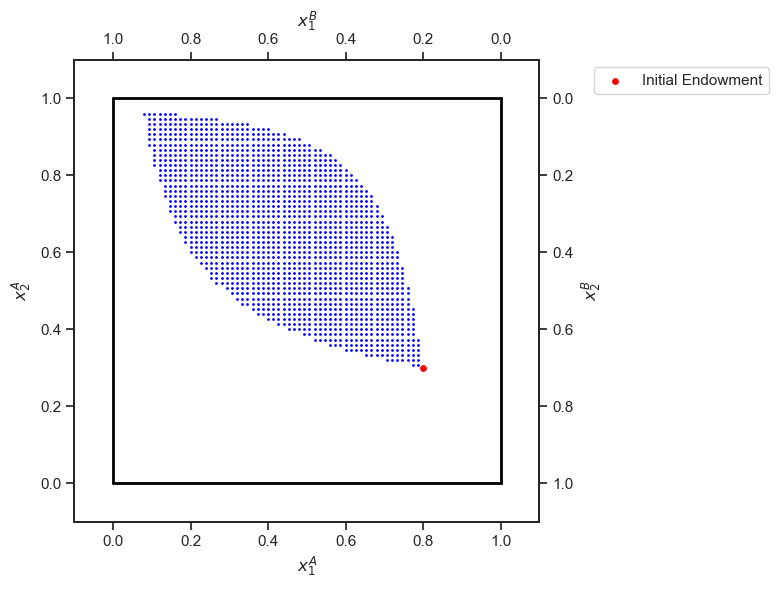

In [2]:
model.plot_feasible_set()

### Q2 - Calculate Errors
For $p_{1}\in\mathcal{P}_{1}=\{0.5,0.5+2\frac{1}{N},0.5+2\frac{2}{N},\dots,2.5\}$ calculate the error in the market clearing condition s

In [3]:
N=75
p1_values = np.linspace(0.5, 2.5, N+1)  # We generate values from 0.5 to 2.5
count_printed = 0
for p1 in p1_values:
    # Calculate market clearing errors using the check_market_clearing method from the py file 
    eps1, eps2 = model.check_market_clearing(p1)
    if count_printed < 5:
        print(f"p1: {p1:.2f}, eps1: {eps1:.4f}, eps2: {eps2:.4f}")
        count_printed += 1

p1: 0.50, eps1: 0.5333, eps2: -0.2667
p1: 0.53, eps1: 0.4759, eps2: -0.2507
p1: 0.55, eps1: 0.4241, eps2: -0.2347
p1: 0.58, eps1: 0.3770, eps2: -0.2187
p1: 0.61, eps1: 0.3341, eps2: -0.2027


### Q3 - Market Clearing Price
We are asked to find the market clearing price. 

In [4]:
model.find_market_clearing_price(N=75, price_range=(0.01, 5), scenario_name='Q3', print_results=True)

utilities:
  A: 0.57
  B: 0.49
allocations:
  A: (0.37, 0.70)
  B: (0.63, 0.30)
other_info:
  market_clearing_price: 0.94


### Q4a - Allocation within $\mathcal{P}_{1}$
Find the allocation if only prices in $\mathcal{P}_{1}$ can be chosen

In [5]:
model.optimize_utility_for_A(N=75, price_range=(0.5, 2.5), scenario_name='Q4a')

utilities:
  A: 0.63
  B: 0.37
allocations:
  A: (0.62, 0.64)
  B: (0.38, 0.36)
other_info:
  optimal_p1: 1.89


### Q4b - Allocation with positive Price
We are asked to find the allocation, if _any_ positive price can be chosen

In [6]:
model.optimize_utility_for_A(N=1000, price_range=(0.01, 100), scenario_name='Q4b')

utilities:
  A: 0.63
  B: 0.37
allocations:
  A: (0.62, 0.64)
  B: (0.38, 0.36)
other_info:
  optimal_p1: 1.91


### Q5a: Allocation when Choice Set restricted to C
Assume that A chooses B’s consumption, but such that B is not worse of than in the initial
endowment. A is thus the market maker.
Find the allocation if the choice set is restricted to C, i.e.

$\max_{(x_{1}^{A},x_{2}^{A})\in\mathcal{C}}u^{A}(x_{1}^{A},x_{2}^{A})$


$
\mathcal{C}=\left\{ (x_{1}^{A},x_{2}^{A})\,|\,\begin{array}{c}
u^{A}(x_{1}^{A},x_{2}^{A})\geq u^{A}(\omega_{1}^{A},\omega_{2}^{A})\\
u^{B}(x_{1}^{B},x_{2}^{B})\geq u^{B}(\omega_{1}^{B},\omega_{2}^{B})\\
x_{1}^{B}=1-x_{1}^{A},\,x_{2}^{B}=1-x_{2}^{A}\\
x_{1}^{A},x_{2}^{A}\in\{0,\frac{1}{N},\frac{2}{N},\dots,1\},N=75
\end{array}\right\} 
$

In [7]:
model.find_optimal_allocation_within_C(N=75, scenario_name='Q5a')

utilities:
  A: 0.74
  B: 0.31
allocations:
  A: (0.56, 0.85)
  B: (0.44, 0.15)


### Q5b - Less Restrictions
Find the allocation if no further restrictions are imposed, i.e.

$
\max_{(x_{1}^{A},x_{2}^{A})\in[0,1]\times[0,1]}u^{A}(x_{1}^{A},x_{2}^{A})\\
\text{s.t. }u^{B}(1-x_{1}^{A},1-x_{2}^{A})\geq u^{B}(\omega_{1}^{B},\omega_{2}^{B})
$

In [8]:
model.optimize_allocation_no_restrictions(scenario_name='Q5b')

utilities:
  A: 0.74
  B: 0.30
allocations:
  A: (0.58, 0.84)
  B: (0.42, 0.16)


### Q6a - Social Planner
Assume A’s and B’s consumption are chosen by a utilitarian social planner to maximize aggregate utility. 

Find the resulting allocation 

$\max_{(x_{1}^{A},x_{2}^{A})\in[0,1]\times[0,1]}u^{A}(x_{1}^{A},x_{2}^{A})+u^{B}(1-x_{1}^{A},1-x_{2}^{A})$

In [9]:
model.find_optimal_allocation_social_planner(scenario_name='Q6a')

utilities:
  A: 0.53
  B: 0.53
allocations:
  A: (0.33, 0.67)
  B: (0.67, 0.33)
other_info:
  optimal_aggregate_utility: 1.06


#### Comparing Social Planner's with Market Solution and those with Constraints

In [10]:
model.compare_results()

Q3: 
  Allocation A = (0.37, 0.70); Allocation B = (0.63, 0.30)
  Utility A = 0.57, Utility B = 0.49, Agg Util = 1.06
----------
Q4a: 
  Allocation A = (0.62, 0.64); Allocation B = (0.38, 0.36)
  Utility A = 0.63, Utility B = 0.37, Agg Util = 1.01
----------
Q4b: 
  Allocation A = (0.62, 0.64); Allocation B = (0.38, 0.36)
  Utility A = 0.63, Utility B = 0.37, Agg Util = 1.01
----------
Q5a: 
  Allocation A = (0.56, 0.85); Allocation B = (0.44, 0.15)
  Utility A = 0.74, Utility B = 0.31, Agg Util = 1.05
----------
Q5b: 
  Allocation A = (0.58, 0.84); Allocation B = (0.42, 0.16)
  Utility A = 0.74, Utility B = 0.30, Agg Util = 1.05
----------
Q6a: 
  Allocation A = (0.33, 0.67); Allocation B = (0.67, 0.33)
  Utility A = 0.53, Utility B = 0.53, Agg Util = 1.06
----------


### Q6b - Illustrate, Compare, Discuss
Illustrate and compare with your results in questions 3)-5).
Discuss the pros and cons of the various allocations.

The 6 subquestion from Q3 to Q6a represent the allocation of the 2 goods in the scenarios below:

Q3: Market Clearing  
Q4a: Maximize Utility A with Price Restriction  
Q4b: Maximize Utility A with Positive Price  
Q5a: A as Market Maker with Choice Restriction  
Q5b: A as Market Maker with No Restriction  
Q6a: Maximize Aggregate Utility  

For better discussion, we use short comments instead of question numbers below.

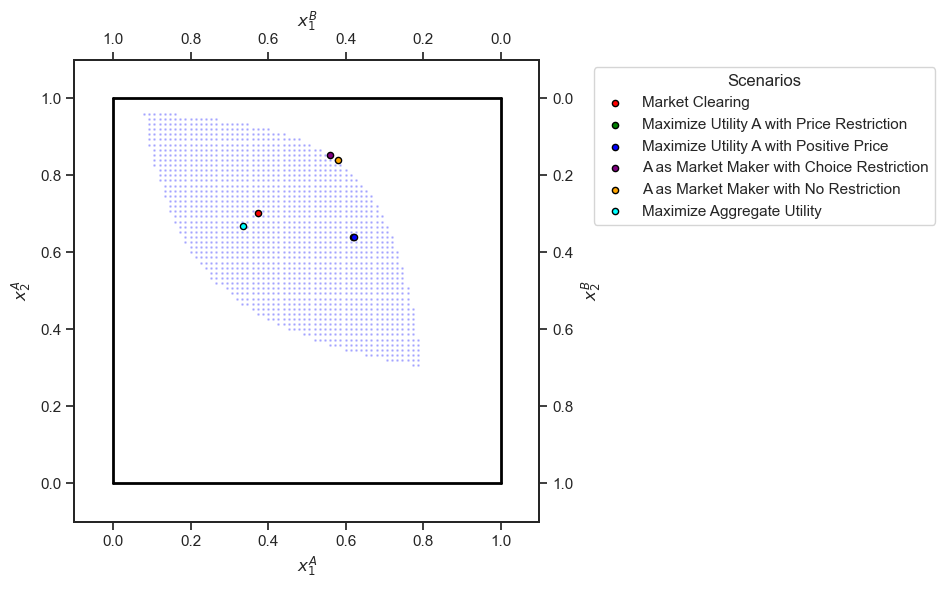

In [11]:
model.plot_comparisons_with_pareto_improvements()

#### Utility Comparison, across Solutions

Available keys in comparison_results: dict_keys(['Q3', 'Q4a', 'Q4b', 'Q5a', 'Q5b', 'Q6a'])


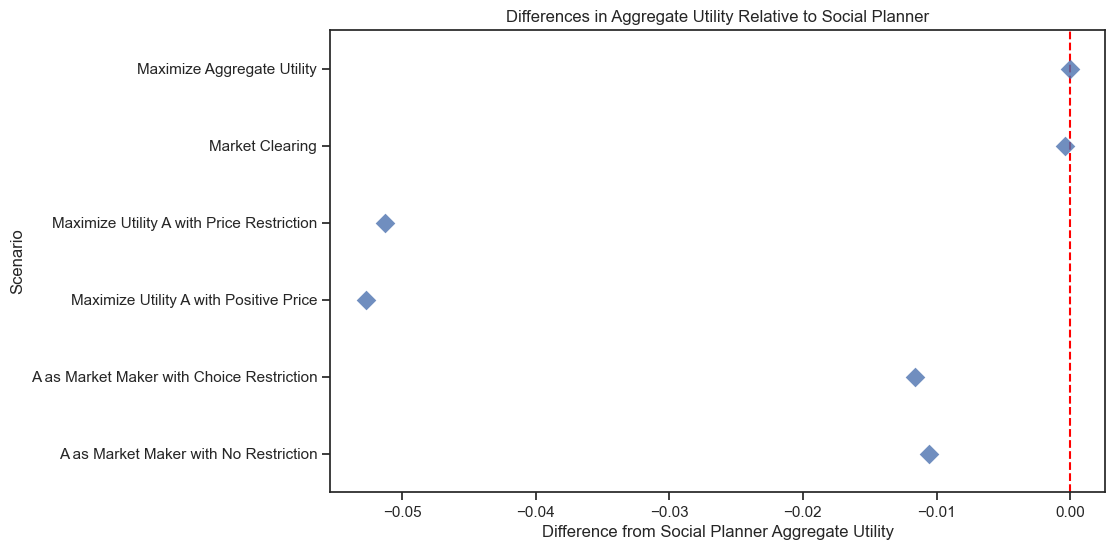

In [12]:
model.plot_utility_differences()

#### Discussion

Q3: Market Clearing  
Pros: Market clearing makes sure supple equals demand, which achieves pareto efficiency that no one can be better off without making the other person worse off.  
Cons: However, market clearing focuses on efficiency over equity, which may result in inequity distributions of goods between consumers. 
 
Q4a: Maximize Utility A with Price Restriction  
Pros: Maximization of Utility A definitely leads to higher satisfaction of consumer A, and price restriction aviods extreme high prices that may fluctuation the market.  
Cons: By focusing on preference of consumer A may distort distribution from equilibirum and lead to low utility of consumer B as well as low social welfare.  

Q4b: Maximize Utility A with Positive Price  
Pros: Maximization of Utility A definitely leads to higher satisfaction of consumer A, while maintaining a positive price.  
Cons: Setting positive prices may distort market signals and resource allocations as prices may not accurately reflect value.  

Q5a: A as Market Maker with Choice Restriction 
Pros: Gives flexibility in managing allocation of resouces based on preference of consumer A under certain conditions. Secures highest utility of consumer A within feasible points of the set.  
Cons: Restrictions on choices may limit overall market efficiency and consumer welfare and disrtort market price.  

Q5b: A as Market Maker with No Restriction  
Pros: Same as before secures high utility of consumer A only with no restrictions.  
Cons: Also same as before could exacerbate inequality if A’s decisions prioritize personal gain over societal welfare.  

Q6a: Maximize Aggregate Utility  
Pros: As taking into account of collective preferences, maximiazing aggregate utility secures improvements in social welfare.  
Cons: Considers collective benefits over individual preference, which may results in individual loss of welfare as consumer A in this case.  

In general, as expected, we see that market solution (Q3) and Social Planner's (Q6) generate the same utility. In the absence of market imperfections, the social planner will not be able to do better than the market. However, consumer as market maker who chooses allocation does better in improving social welfare than only considering maximizing utility A based on the price. Price restrictions, apparently tend to lowering aggregate utility. Aside from these, different restrictions in similar scenarios does not have significant differences in the allocation of goods and consumer utility as well as aggregate utility.

### Q7 - Draw a set $\mathcal{W}$ with 50 elements
Consider the random set
$\mathcal{W}=\left\{ \left(\omega_{1}^{A},\omega_{2}^{A}\right)\,|\,\omega_{1}^{A}\sim\mathcal{U}(0,1),\omega_{2}^{A}\sim\mathcal{U}(0,1)\right\}$
Draw a set $\mathcal{W}$ with 50 elements

First few elements of set W:
(0.3745401188473625, 0.9695846277645586)
(0.9507143064099162, 0.7751328233611146)
(0.7319939418114051, 0.9394989415641891)
(0.5986584841970366, 0.8948273504276488)
(0.15601864044243652, 0.5978999788110851)


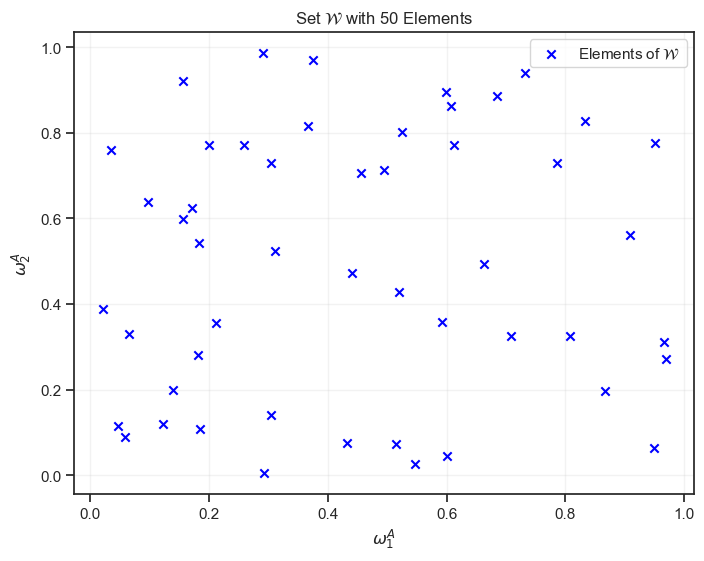

In [13]:
model.draw_random_set()

### Q8 - Market Equilibrium
Find the market equilibrium allocation for each ωA ∈ C and plot them in the Edgeworth box

In [14]:
original_endowment = (0.8, 0.3)
W = model.generate_W(n_elements=50) 
equilibriums = model.find_equilibriums_with_clearing_price_and_check(original_endowment, W)
print(f"Found {len(equilibriums)} equilibria.")

Found 23 equilibria.


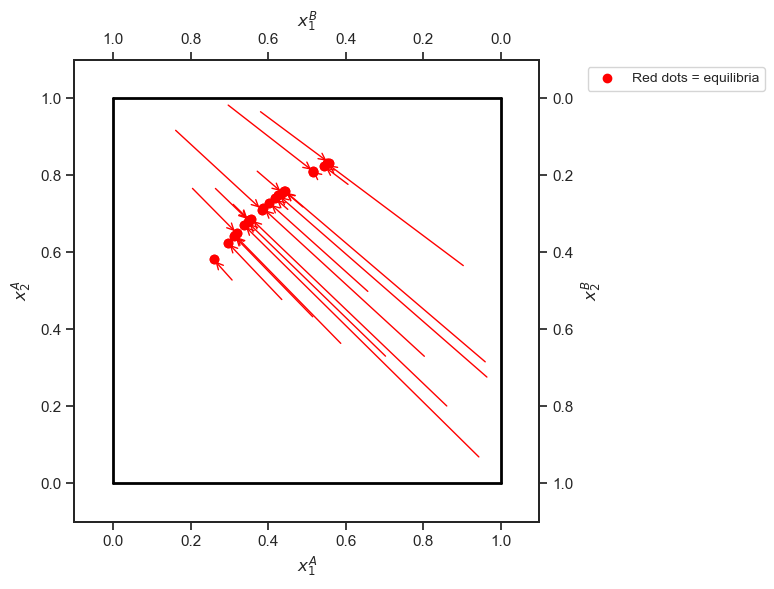

In [15]:
model.plot_movement_from_endowment_to_equilibrium(equilibriums)

We see efficient allocations on the contract curve. 

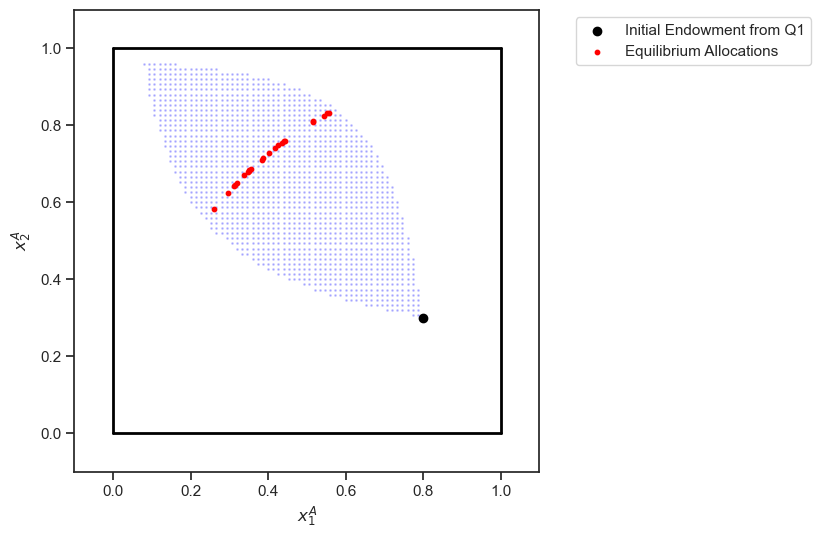

In [16]:
model.plot_contract_curve (initial_utility_A, initial_utility_B, equilibriums)